# Report - COVID19 papers (CORD-19)

In [1]:
# OUR NAMES

In [2]:
# imports
import pandas as pd

%load_ext autoreload
%autoreload 2

First you will need to create `data` folder and place it in the same folder with the `Report.ipynb`, `dataset.py`, `model.py`.

**Download the data**

There are 2 ways to download the data - the easy way and the long way :).
1. The easy way: we parsed the data and created df with 20k papaers.\
   Download the `metadata.csv` and `covid_20k_df.csv` from [here](https://drive.google.com/drive/folders/1iij-AgINu--a49WIypLTzbYqqJZOh46k?usp=sharing) and place them in the `data` folder
2. Download the files from [Here](https://www.kaggle.com/datasets/allen-institute-for-ai/CORD-19-research-challenge) and place all of them in the `data` folder.

Then run the `load_create_dataset()` function. In case of 1 it will load the df. In case of 2 it will parse all the data and manully create the df (it will take few mins). We suggest using the first way.


In [3]:
from dataset import load_create_dataset
covid_df = load_create_dataset()

loaded data/covid_20k_df.csv


In [5]:
covid_df.head()

,title,paper_id,abstract,body_text
0,Recruitment methods and yield rates in a clini...,000e6f401f0f46b240cc81f2c9ef41914bfb9e06,Background: Although the prevalence of hyperte...,The prevalence of hypertension is increasing w...
1,Impact of the COVID-19 Pandemic on Daily Life:...,0012308e8c02792b907c31935868f1afbff2c59b,"Using a mixed methods design, this study aimed...",travel restrictions. These measures aimed to p...
2,Colchicine Against SARS-CoV-2 Infection: What ...,0015cecc2298c3bdb9bda0e0b84b38ebdcca716f,Coronavirus disease 2019 caused by the severe ...,Systemic inflammation is the hallmark of coron...
3,Use and misuse of prescription stimulants by u...,001716d1b1c1e9d9c1c8b3751e620371f2ddf2d4,Background: Misuse of prescription stimulants ...,"Global Drug Survey, an increase of neuroenhanc..."
4,A Neural Phillips Curve and a Deep Output Gap,001746ab8ab396aa3a7bc6b45ba75f26ec860fa9,Many problems plague the estimation of Phillip...,Few equations are as central to modern macroec...


In [4]:
metadata = pd.read_csv('data/metadata.csv')
metadata.head()

C:\Users\itama\AppData\Local\Temp\ipykernel_13288\3383827403.py:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv('data/metadata.csv')


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


## Part 1 - Paper Similarity using gzip as our compressing method on text data only

Our seggested method is to use GZIP to compress text, calculate the length of the compress file and use NCD to calculate the distance. Then taking the k most similer (distance wise) papers.

**GZIP:** is based on the DEFLATE algorithm, which is a lossless data compression that uses a combination of LZ77 and Huffman coding.

**NCD:** (Normalized compression distance) is a way of measuring the similarity between two objects, be it two documents, two letters, two emails, two music scores, two languages, two programs, two pictures, two systems, two genomes, to name a few. Such a measurement should not be application dependent or arbitrary. A reasonable definition for the similarity between two objects is how difficult it is to transform them into each other. [Further information can be found on this blog post](https://medium.com/@kanvaly/normalized-compression-distance-d8698bc650b4)

If two objects compress better together than separately, it means they
share common patterns and are similar!! <br>
![NCD Formula](img/NCD.png)

Let's take a paper as an example. Calculate the NCD distance to all other papers and take the 10 closest papers.
We will compare article based on their abstract.
You can choose between the body text, the title or the abstract by changing the `txt_to_encode` param.

In [7]:
import model as model
paper_id = '88b80f02e54d2ed8c9f05f422b45f4810a6a405b' # Example
k = 10
similarity_df = model.k_similar_papers(paper_id, k, covid_df, txt_to_encode='abstract')
similarity_df

,title,paper_id,abstract,body_text,ncd_distance
10586,Explainable machine learning to predict long-t...,88b80f02e54d2ed8c9f05f422b45f4810a6a405b,Background: Machine learning (ML) model is inc...,The long-term outcome is currently an emerging...,0.037691
10443,Comparative analysis of explainable machine le...,8710f527c4706f1ae42013a4d7688b1ec03f73aa,Background: Machine learning (ML) holds the pr...,"underlying structure of the data, while ML mod...",0.777518
1822,Prediction of 3-year risk of diabetic kidney d...,18a795e30445a0f4ab3eb1be1198a805deb0e1fa,Background: Established prediction models of D...,clinical decision-making. Understanding the ri...,0.795195
7182,Predicting the necessity of oxygen therapy in ...,5d6ad19f8d11971024d1b7a4a23e6cd7378cd15b,Medical oxygen is a critical element in the tr...,"Since the spread of COVID-19 in December 2019,...",0.805654
7026,Article 852736 1 (2022) A Promising Preoperati...,5b9d41960cd05dbc62122130019030e29f1b4ae2,Background: The non-invasive preoperative diag...,Hepatocellular carcinoma (HCC) is one of the m...,0.807205
7830,Mortality Predictive Value of APACHE II and SO...,6621c2bde72488b15a577d92fb8613a77461266b,Background. COVID-19 pandemic has become a glo...,"In December 2019, severe acute respiratory syn...",0.813725
3855,Journal Pre-proofs Can we reliably automate cl...,32d17d06540281827e8a013e51f98e953e7f114f,Background: Building Machine Learning (ML) mod...,What was already known on the topic:  Classic...,0.818610
10952,Predicting ionized hypocalcemia: External vali...,8dd1465054a2ef6c952fedf0ed9af361ea1a38ef,Background: Ionized hypocalcemia is common in ...,New York City was the epicenter of the COVID-1...,0.824499
11532,Early changes in laboratory tests predict live...,959423993ae9a583d8f26edf1842128dc086ae06,Background: Most patients with coronavirus dis...,. Studies have shown that COVID-19 can affect ...,0.828033
6434,Comparing different machine learning technique...,53d8d480246f79239ebc56e87c0384a8085ba514,Background: Coronavirus disease 2019 (COVID-19...,Coronavirus disease 2019 (COVID-19) has been a...,0.828685


In [10]:
for title in similarity_df.title:
    print(title)
    print('---------------------')

Explainable machine learning to predict long-term mortality in critically ill ventilated patients: a retrospective study in central Taiwan
---------------------
Comparative analysis of explainable machine learning prediction models for hospital mortality
---------------------
Prediction of 3-year risk of diabetic kidney disease using machine learning based on electronic medical records
---------------------
Predicting the necessity of oxygen therapy in the early stage of COVID-19 using machine learning
---------------------
Article 852736 1 (2022) A Promising Preoperative Prediction Model for Microvascular Invasion in Hepatocellular Carcinoma Based on an Extreme Gradient Boosting Algorithm
---------------------
Mortality Predictive Value of APACHE II and SOFA Scores in COVID-19 Patients in the Intensive Care Unit
---------------------
Journal Pre-proofs Can we reliably automate clinical prognostic modelling? A retrospective co- hort study for ICU triage prediction of in-hospital mortal

In this example, we found some similar papers using the comparison method. our paper was in the field of machine learning 
From the results, we can see that we got papers in the field of machine learning are also represented.

## Part 2 - Clustering using Compression method from Part 1

Our idea is to make several features based on the compression method. we saw in part A that actually, we can get some similar papers based on this method. so we decided to enrich the idea and create 3 features based on compression on the title, paper body text, and abstract text. we think this logic will find clusters with similar papers.
<div>
<img src="img/model.png" width="500"/>
</div>

In [13]:
import gzip

def compress(x):
    x = str(x).encode()
    l_x = len(gzip.compress(x))
    return l_x

# Apply Compression method from Part A
train = covid_df.copy()
train['comp_title'] = train['title'].apply(compress)
train['comp_body'] = train['body_text'].apply(compress)
train['comp_abstract'] = train['abstract'].apply(compress)

In [14]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()
paper_ids =  covid_df['paper_id']
train = train[['paper_id','comp_title','comp_body','comp_abstract']]
train['comp_title'] = normalizer.fit_transform(train[['comp_title']])
train['comp_body'] = normalizer.fit_transform(train[['comp_body']])
train['comp_abstract'] = normalizer.fit_transform(train[['comp_abstract']])       
train.head()

,paper_id,comp_title,comp_body,comp_abstract
0,000e6f401f0f46b240cc81f2c9ef41914bfb9e06,0.135011,0.026254,0.072663
1,0012308e8c02792b907c31935868f1afbff2c59b,0.092677,0.050131,0.028883
2,0015cecc2298c3bdb9bda0e0b84b38ebdcca716f,0.069794,0.027313,0.048208
3,001716d1b1c1e9d9c1c8b3751e620371f2ddf2d4,0.127002,0.036918,0.053689
4,001746ab8ab396aa3a7bc6b45ba75f26ec860fa9,0.050343,0.141596,0.160014


##### Choose optimal K  - Elbow method

In [17]:
from sklearn import metrics
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# run kmeans with many different k
distortions = []
K = range(2, 17)

data = train[['comp_title','comp_body','comp_abstract']]

for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(data)
    k_means.fit(data)
    distortions.append(sum(np.min(cdist(data, k_means.cluster_centers_, 'euclidean'), axis=1)) / train.shape[0])

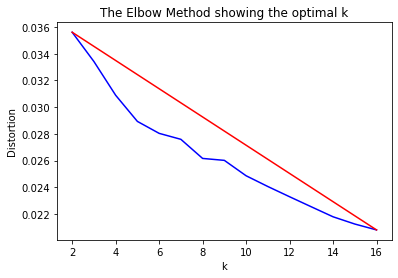

In [18]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### Final Clustering  K= 5

In [19]:
kmeans = KMeans(n_clusters=5, random_state=0)
 
#predict the labels of clusters.
label = kmeans.fit_predict(train[['comp_title','comp_body','comp_abstract']])

##### Visualizatoion

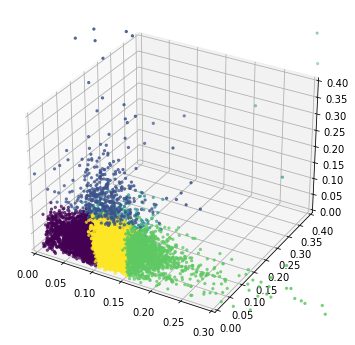

In [20]:
import matplotlib.pyplot as plt
import numpy as np 


fig = plt.figure(1, figsize=(25, 6))
ax = plt.axes(projection = '3d')
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], marker='.', c = label)
plt.xlim([0, 0.3])
plt.ylim([0, 0.4])
ax.set_zlim(0, 0.4);

Looks like a good separation

#####  Analysis

In order to see if the clusters actually presenting similar papers we will take the example from part A and check if they are in the same cluster.

In [21]:
example_paper = '88b80f02e54d2ed8c9f05f422b45f4810a6a405b'
example_paper_raw_data = train[train['paper_id'] == example_paper]
predicted_cluster_example_paper = kmeans.predict(example_paper_raw_data[['comp_title','comp_body','comp_abstract']])[0]
counter = 0 

for similar_paper in similarity_df['paper_id'].values[1:]:
    paper_raw_data = train[train['paper_id'] == similar_paper]
    paper_raw_data = paper_raw_data[['comp_title','comp_body','comp_abstract']]
    paper_pridiction = kmeans.predict(paper_raw_data)
    if paper_pridiction == predicted_cluster_example_paper:
        counter += 1
counter

6

Wow! 6 out of ten were in the same cluster. In addition, we saw in Part A an example paper in the field of machine learning. therefore,  This cluster seems to represent a good collection of papers in the field of machine learning.

#####  Furhter Work

Based only on the compression method and using only text data in this work, we got pretty good results. For future work, we would like to add some more methods, such as word embedding (DOC2VEC), and create a model that incorporates both methods and more metadata features. Using this approach, we believe that we will achieve better performance and similarity.